In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow.keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [93]:
features =pd.read_csv('temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [94]:
print(features.shape)

(348, 9)


In [95]:
import datetime

years = features['year']
months = features['month']
days = features['day']

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year,month,day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [96]:
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

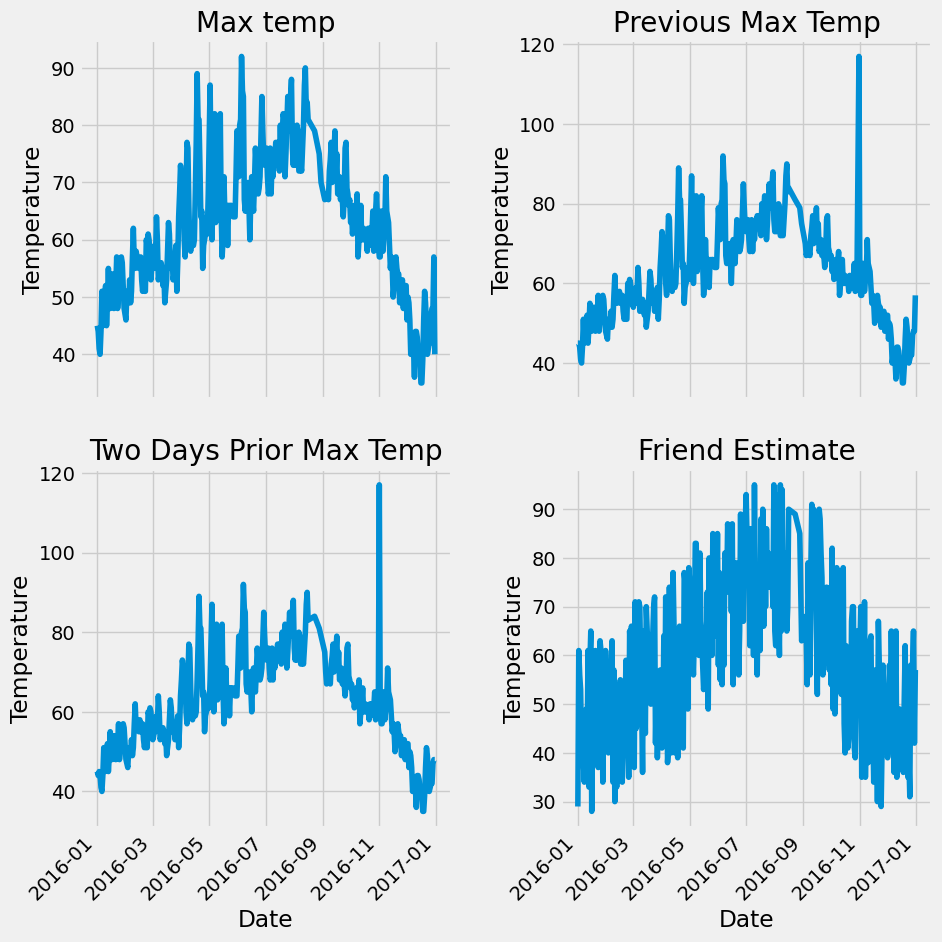

In [97]:
plt.style.use('fivethirtyeight')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation= 45)

ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max temp')

ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [98]:
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [99]:
labels = np.array(features['actual'])

features = features.drop('actual', axis=1)

features_list = list(features.columns)

features = np.array(features)

In [100]:
features.shape

(348, 14)

In [101]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

In [102]:
input_features[0]

array([ 0.        , -1.5678393 , -1.65682171, -1.45311448, -1.46252836,
       -1.3470703 , -1.98891668,  2.44131112, -0.40482045, -0.40961596,
       -0.40482045, -0.40482045, -0.41913682, -0.40482045])

In [103]:
model = tf.keras.Sequential()
model.add(layers.Dense(16,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(layers.Dense(32,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(layers.Dense(1,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.03)))

In [104]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001), loss='mean_squared_error')

model.fit(input_features, labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 0s 34ms/step - loss: 4391.0293 - val_loss: 2870.4441
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 4297.9121 - val_loss: 2790.5369
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 4189.2915 - val_loss: 2684.8989
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 4018.8386 - val_loss: 2489.9360
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 3518.2937 - val_loss: 2180.0496
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 957.8901 - val_loss: 1488.8975
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 97.2226 - val_loss: 1321.2119
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 94.6005 - val_loss: 976.6231
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 43.5764 - val_loss: 895.5189
Epoch 10/100
5/5 [==============================] - 0s 9ms/step - loss: 73.48

In [105]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                240       
                                                                 
 dense_19 (Dense)            (None, 32)                544       
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


In [106]:
#predict
predict = model.predict(input_features)

11/11 [==============================] - 0s 1ms/step


In [107]:
predict.shape

(348, 1)

In [108]:
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

true_data = pd.DataFrame(data = {'date': dates, 'actual':labels})

months = features [:, features_list.index('month')]
days = features [:, features_list.index('day')]
years = features [:, features_list.index('year')]

test_dates = [str(int(year))+ '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predict.reshape(-1)})

Text(0.5, 1.0, 'Actual and Predicted Values')

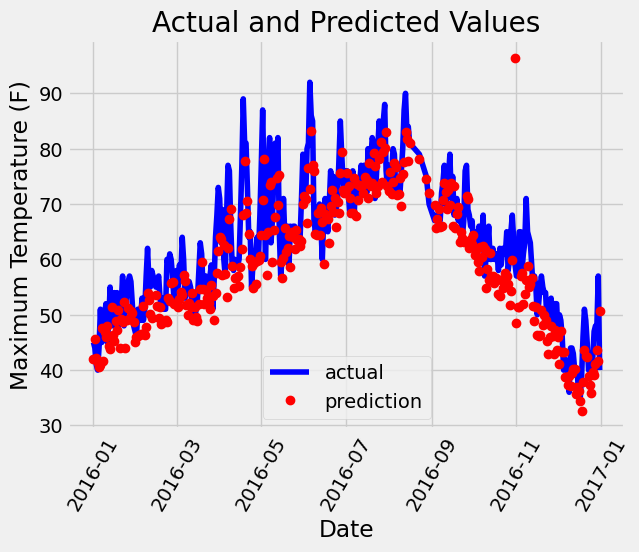

In [109]:
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = 60)
plt.legend()

plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values')